### Firstly I need to obtain and clean data

Inital thoughts are to get all of the data together then I can see if avoiding the need for a form of database is possible!{mongoDB/SQL}.

STEPS
+ Trawl the web for data and download
+ Explore the possibility of developing a web scrapper to obtain data
+ Find method to obtain climatic data
+ Find method to obtain practical[for computing] data on the personal data of players e.g. parenthood, family member death, etc

http://www.tennis-data.co.uk/alldata.php

http://www.tennisabstract.com/blog/2015/03/24/free-atp-and-wta-results-and-stats-databases/

http://tennis.wettpoint.com/en/

http://www.coretennis.net/

http://www.tennisexplorer.com/

https://app.exmerg.com/

http://www.atpworldtour.com/ use with https://github.com/danielkorzekwa/atpworldtour-api

######## BELOW Not a data provider but a analysis program so maybe some ideas!

http://www.oncourt.info/


In [1]:
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import re

import os

In [2]:
!pwd

/vagrant/notebooks/tennisBetting


In [3]:
# Shows all the files available in the current working directory.
!ls

Cookbook_to_import_and_clean.ipynb
Started playing with tennis CSV ;).ipynb
dataSets
endOfModuleTennisBetting.ipynb
tennis_betting.ipynb
tma_q1_play_to_search_json_data_for_website.ipynb


In [4]:
# Sets the current working directory because !cwd won't work
os.chdir("/vagrant/notebooks/tennisBetting/dataSets/2016_tennisDataAll/ATP_2016")

In [5]:
!file /vagrant/notebooks/tennisBetting/dataSets/2016_tennisDataAll/ATP_2016/2016.xlsx

/vagrant/notebooks/tennisBetting/dataSets/2016_tennisDataAll/ATP_2016/2016.xlsx: Microsoft Excel 2007+


In [6]:
!ls

2016.xlsx


In [7]:
data_2016 = pd.read_excel('/vagrant/notebooks/tennisBetting/dataSets/2016_tennisDataAll/ATP_2016/2016.xlsx')
data_2016

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.68,2.10,1.62,2.25,1.68,2.31,1.76,2.35,1.66,2.20
1,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kudla D.,...,1.58,2.35,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37
2,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kamke T.,...,1.82,1.90,1.80,2.00,1.90,1.99,1.90,2.10,1.77,2.00
3,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Chung H.,...,1.82,1.90,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95
4,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Goffin D.,...,1.30,3.40,1.29,3.75,1.31,3.74,1.31,3.80,1.29,3.56
5,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Troicki V.,...,2.15,1.68,2.10,1.73,2.37,1.65,2.38,1.74,2.17,1.67
6,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Thiem D.,...,1.30,3.40,1.33,3.40,1.37,3.33,1.37,3.55,1.32,3.29
7,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Stepanek R.,...,1.90,1.80,2.00,1.80,2.00,1.89,2.05,1.90,1.94,1.82
8,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Dodig I.,...,1.06,8.00,1.08,8.00,1.07,10.95,1.09,10.95,1.06,8.73
9,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Pouille L.,...,2.25,1.60,2.20,1.67,2.38,1.64,2.45,1.67,2.28,1.61


In [8]:
# tournament2016 = data_2016.groupby('Tournament')
# tournament2016.mean()

In [9]:
#list(tournament2016)
#tournament2016.dtypes


# age_change_components.dtypes

In [10]:
# pd.isnull(change_components).any(1).nonzero()[0]

pd.isnull(data_2016).any(1).nonzero()[0]

array([   0,    1,    2, ..., 2623, 2624, 2625], dtype=int32)

In [11]:
# list(data_2016)

# Column deffinitions

+ ATP = Tournament number (men)
+ WTA = Tournament number (women)
+ Location = Venue of tournament
+ Tournament = Name of tounament (including sponsor if relevant)
+ Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)
+ Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
+ Tier = Tier (tournament ranking) of WTA tennis series.
+ Court = Type of court (outdoors or indoors)
+ Surface = Type of surface (clay, hard, carpet or grass)
+ Round = Round of match
+ Best of = Maximum number of sets playable in match
+ Winner = Match winner
+ Loser = Match loser
+ WRank = ATP Entry ranking of the match winner as of the start of the tournament
+ LRank = ATP Entry ranking of the match loser as of the start of the tournament
+ WPts = ATP Entry points of the match winner as of the start of the tournament
+ LPts = ATP Entry points of the match loser as of the start of the tournament
+ W1 = Number of games won in 1st set by match winner
+ L1 = Number of games won in 1st set by match loser
+ W2 = Number of games won in 2nd set by match winner
+ L2 = Number of games won in 2nd set by match loser
+ W3 = Number of games won in 3rd set by match winner
+ L3 = Number of games won in 3rd set by match loser
+ W4 = Number of games won in 4th set by match winner
+ L4 = Number of games won in 4th set by match loser
+ W5 = Number of games won in 5th set by match winner
+ L5 = Number of games won in 5th set by match loser
+ Wsets = Number of sets won by match winner
+ Lsets = Number of sets won by match loser
+ Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)


### Key to match betting odds data:

+ B365W = Bet365 odds of match winner
+ B365L = Bet365 odds of match loser
+ B&WW = Bet&Win odds of match winner
+ B&WL = Bet&Win odds of match loser
+ CBW = Centrebet odds of match winner
+ CBL = Centrebet odds of match loser
+ EXW = Expekt odds of match winner
+ EXL = Expekt odds of match loser
+ LBW = Ladbrokes odds of match winner
+ LBL = Ladbrokes odds of match loser
+ GBW = Gamebookers odds of match winner
+ GBL = Gamebookers odds of match loser
+ IWW = Interwetten odds of match winner
+ IWL = Interwetten odds of match loser
+ PSW = Pinnacles Sports odds of match winner
+ PSL = Pinnacles Sports odds of match loser
+ SBW = Sportingbet odds of match winner
+ SBL = Sportingbet odds of match loser
+ SJW = Stan James odds of match winner
+ SJL = Stan James odds of match loser
+ UBW = Unibet odds of match winner
+ UBL = Unibet odds of match loser

+ MaxW= Maximum odds of match winner (as shown by Oddsportal.com)
+ MaxL= Maximum odds of match loser (as shown by Oddsportal.com)
+ AvgW= Average odds of match winner (as shown by Oddsportal.com)
+ AvgL= Average odds of match loser (as shown by Oddsportal.com)

In [12]:
# Table of round, looser name, ATP ranking the difference in ranking to match winner and the 
# Brisbane International

winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'Brisbane International']

#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

winnerMinusLooser['rankDifference'] = winnerMinusLooser['LRank'] - winnerMinusLooser['WRank']


winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
0,1st Round,Simon G.,15,-13,Dimitrov G.,28
1,1st Round,Smith J.P.,129,60,Kudla D.,69
2,1st Round,Mitchell B.,231,-46,Kamke T.,277
3,1st Round,Groth S.,60,9,Chung H.,51
4,1st Round,Bellucci T.,37,21,Goffin D.,16
5,1st Round,Johnson S.,32,10,Troicki V.,22
6,1st Round,Duckworth J.,120,100,Thiem D.,20
7,1st Round,Lajovic D.,76,-121,Stepanek R.,197
8,1st Round,Anderson O.,813,726,Dodig I.,87
9,1st Round,Nishioka Y.,117,39,Pouille L.,78


In [13]:
#winnerMinusLooser['rankDifference'].sum() # 1518.0

#winnerMinusLooser['rankDifference'].mean() # 56.222

0.28268311333730362

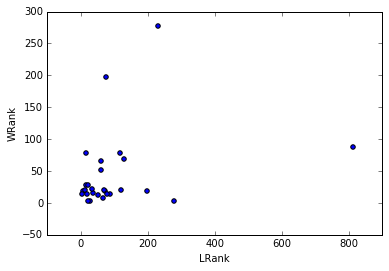

In [14]:
winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')
winnerMinusLooser['LRank'].corr(winnerMinusLooser['WRank'], method= 'pearson')

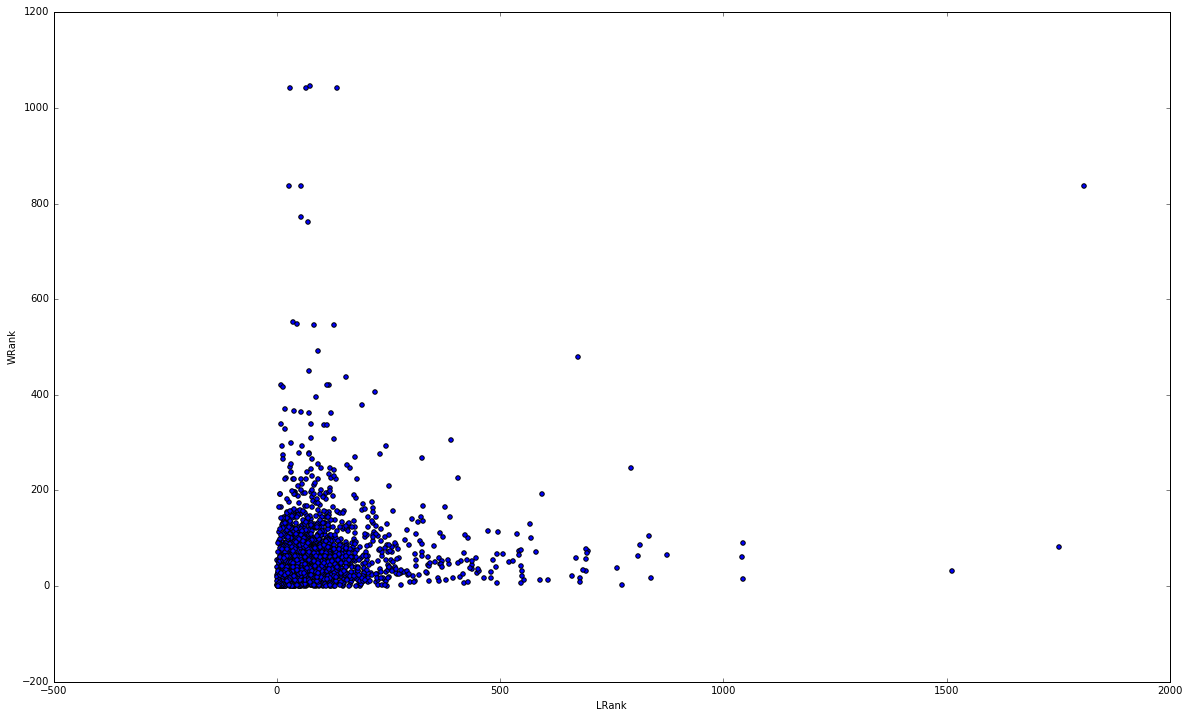

In [15]:
data_2016.plot.scatter(x = 'LRank', y = 'WRank', figsize=(20,12))

In [16]:
# Series.corr(other, method='pearson', min_periods=None)

# data_2016.plot.scatter(x = 'LRank', y = 'WRank', figsize=(20,12))

data_2016['LRank'].corr(data_2016['WRank'], method= 'pearson')




0.12013317529148389

## Test null that the relationship between winner rank and looser rank depending on court surface

## Conclusion:

Regarding the court surface there seems very little difference in relationship between winner and looser rank for different court surfaces (Clay, Hard, Grass).

The correlations are:

+ Clay: 0.12
+ Hard: 0.14
+ Grass: 0.05

None of this is particuarly supprising in that the pattern is more erratic on grass. Clay and Hard are very similar.

#### Can also test

+ tournament

In [17]:
#data_2016.Surface.unique()

# array(['Hard', 'Clay', 'Grass'], dtype=object)

In [ ]:
# SAMPLE CELL TO BE DELETED ******
the_region = ''
the_region_name = ''


for index, row in age_change_components.iterrows():
    
    if re.search('^E', str(row.region_code)):

        if re.search('^E12', str(row.region_code)):
            the_region = str(row.region_code)
            the_region_name = str(row.lad2014_name)

        age_change_components.loc[index, 'Region_code'] = the_region
        age_change_components.loc[index, 'Region_name'] = the_region_name
        
    else:
        pass
            
age_change_components[:5]

In [42]:
the_tourn = data_2016.loc[0][['Tournament']]
#print(the_tourn)

temp_df = pd.DataFrame()

for index, row in data_2016.iterrows():
    
    if row.Tournament == the_tourn:

        temp_df.append(row)
    
    if row.Tournament != the_tourn:
        the_tourn = row.Torrnament
        temp_df.plotScatter(x = 'LRank', y = 'WRank')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [39]:
# CLAY 806 matches

CLAY_winnerMinusLooser = data_2016.loc[data_2016['Surface'] == 'Clay']

0.12009578120694338

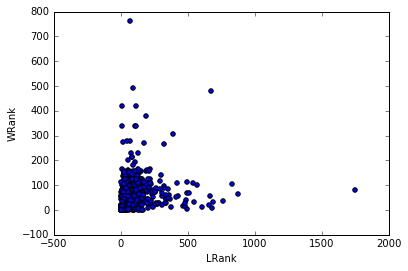

In [40]:
CLAY_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')
CLAY_winnerMinusLooser['LRank'].corr(CLAY_winnerMinusLooser['WRank'], method= 'pearson')

In [20]:
# HARD 1503 matches [i think]

HARD_winnerMinusLooser = data_2016.loc[data_2016['Surface'] == 'Hard']

0.13500458384516939

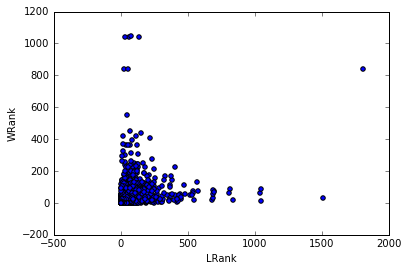

In [21]:
HARD_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')
HARD_winnerMinusLooser['LRank'].corr(HARD_winnerMinusLooser['WRank'], method= 'pearson')

In [22]:
# GRASS 317 matches [i think]

GRASS_winnerMinusLooser = data_2016.loc[data_2016['Surface'] == 'Grass']

0.045626490613035378

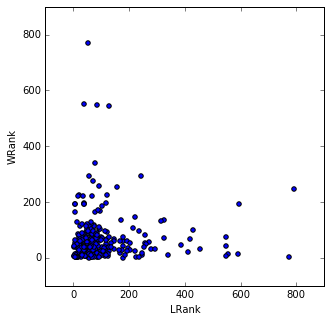

In [23]:
GRASS_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank',figsize=(5,5))
GRASS_winnerMinusLooser['LRank'].corr(GRASS_winnerMinusLooser['WRank'], method= 'pearson')

## Test null that the relationship between winner rank and looser rank depending on tournament

## Conclusion:

Number of events = 66

In [24]:
CHENNAI_winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'Chennai Open']
#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

CHENNAI_winnerMinusLooser['rankDifference'] = CHENNAI_winnerMinusLooser['LRank'] - CHENNAI_winnerMinusLooser['WRank']


CHENNAI_winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
27,1st Round,Donskoy E.,91,-1,Millman J.,92
28,1st Round,Almagro N.,73,-376,Pavic A.,449
29,1st Round,Granollers M.,84,40,Coric B.,44
30,1st Round,Daniel T.,96,69,Garcia-Lopez G.,27
31,1st Round,Devvarman S.,177,-8,Rublev A.,185
32,1st Round,Ram R.,89,-15,Krajicek A.,104
33,1st Round,Giraldo S.,70,15,Rosol L.,55
34,1st Round,Gimeno-Traver D.,98,-150,Ramanathan R.,248
35,1st Round,Struff J.L.,107,1,Vanni L.,106
36,1st Round,Khachanov K.,152,114,Muller G.,38


0.022077136130158926

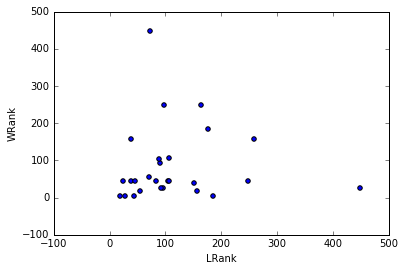

In [25]:
CHENNAI_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')
CHENNAI_winnerMinusLooser['LRank'].corr(CHENNAI_winnerMinusLooser['WRank'], method= 'pearson')

In [27]:
QATAR_winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'Qatar Exxon Mobil Open']
#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

QATAR_winnerMinusLooser['rankDifference'] = QATAR_winnerMinusLooser['LRank'] - QATAR_winnerMinusLooser['WRank']


QATAR_winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
54,1st Round,Cecchinato M.,90,8,Dzumhur D.,82
55,1st Round,Zayid M. S.,1512,1481,Chardy J.,31
56,1st Round,Klizan M.,43,-59,Edmund K.,102
57,1st Round,Brown D.,118,117,Djokovic N.,1
58,1st Round,Karatsev A.,195,129,Haase R.,66
59,1st Round,Lopez F.,17,-58,Munoz-De La Nava D.,75
60,1st Round,Ilhan M.,114,35,Kuznetsov An.,79
61,1st Round,Lorenzi P.,68,4,Andujar P.,64
62,1st Round,Stakhovsky S.,62,56,Berdych T.,6
63,1st Round,Bolelli S.,58,8,Gabashvili T.,50


-0.074523057931886502

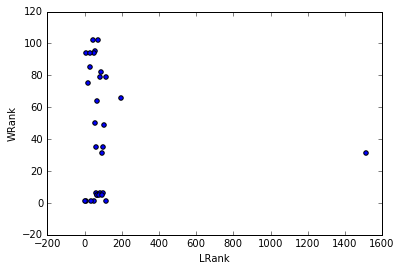

In [28]:
QATAR_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')

QATAR_winnerMinusLooser['LRank'].corr(QATAR_winnerMinusLooser['WRank'], method= 'pearson')

In [29]:
AUCKLAND_winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'ASB Classic']
#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

AUCKLAND_winnerMinusLooser['rankDifference'] = AUCKLAND_winnerMinusLooser['LRank'] - AUCKLAND_winnerMinusLooser['WRank']


AUCKLAND_winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
85,1st Round,Andujar P.,59,-5,Haase R.,64
86,1st Round,Tearney F.,365,319,Young D.,46
87,1st Round,Johnson S.,32,-267,Barton M.,299
88,1st Round,Ramos-Vinolas A.,55,-45,De Bakker T.,100
89,1st Round,Estrella Burgos V.,56,30,Sock J.,26
90,1st Round,Karlovic I.,23,-16,Pospisil V.,39
91,1st Round,Becker B.,98,64,Kohlschreiber P.,34
92,1st Round,Bedene A.,49,-11,Querrey S.,60
93,1st Round,Vesely J.,42,17,Bautista R.,25
94,1st Round,Sousa J.,33,12,Fognini F.,21


-0.11001741808279332

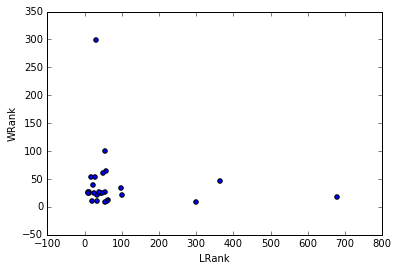

In [30]:
AUCKLAND_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')

AUCKLAND_winnerMinusLooser['LRank'].corr(AUCKLAND_winnerMinusLooser['WRank'], method= 'pearson')

In [31]:
SYDNEY_winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'Apia International']
#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

SYDNEY_winnerMinusLooser['rankDifference'] = SYDNEY_winnerMinusLooser['LRank'] - SYDNEY_winnerMinusLooser['WRank']


SYDNEY_winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
112,1st Round,Istomin D.,61,32,Seppi A.,29
113,1st Round,Bolelli S.,58,-137,Sarkissian A.,195
114,1st Round,Klizan M.,45,-104,Thompson J.,149
115,1st Round,Marterer M.,265,224,Cuevas P.,41
116,1st Round,Millman J.,93,50,Robredo T.,43
117,1st Round,Mayer L.,35,-15,Gabashvili T.,50
118,1st Round,Mannarino A.,44,-27,Mahut N.,71
119,1st Round,Bellucci T.,37,1,Dolgopolov O.,36
120,1st Round,Kukushkin M.,63,32,Chardy J.,31
121,1st Round,Coric B.,40,2,Muller G.,38


-0.097997271177143588

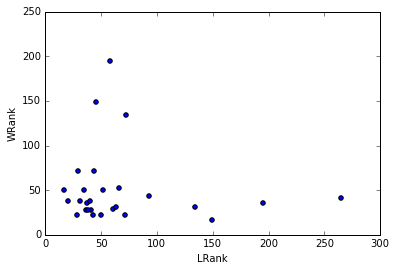

In [32]:
SYDNEY_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')

SYDNEY_winnerMinusLooser['LRank'].corr(SYDNEY_winnerMinusLooser['WRank'], method= 'pearson')

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [33]:
OZ_winnerMinusLooser = data_2016.loc[data_2016['Tournament'] == 'Australian Open']
#winnerMinusLooser['WRank'] - winnerMinusLooser['LRank']

OZ_winnerMinusLooser['rankDifference'] = OZ_winnerMinusLooser['LRank'] - OZ_winnerMinusLooser['WRank']


OZ_winnerMinusLooser[['Round','Loser', 'LRank', 'rankDifference', 'Winner', 'WRank']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Round,Loser,LRank,rankDifference,Winner,WRank
139,1st Round,Haase R.,65,-73,Basic M.,138
140,1st Round,Stakhovsky S.,60,44,Goffin D.,16
141,1st Round,Edmund K.,88,7,Dzumhur D.,81
142,1st Round,Estrella Burgos V.,55,-96,Brands D.,151
143,1st Round,Kohlschreiber P.,34,27,Nishikori K.,7
144,1st Round,Wu D.,243,140,Krajicek A.,103
145,1st Round,Mayer L.,36,16,Thiem D.,20
146,1st Round,Karlovic I.,24,-29,Delbonis F.,53
147,1st Round,De Bakker T.,98,85,Cilic M.,13
148,1st Round,Cervantes I.,72,-19,Donskoy E.,91


0.15135460670109299

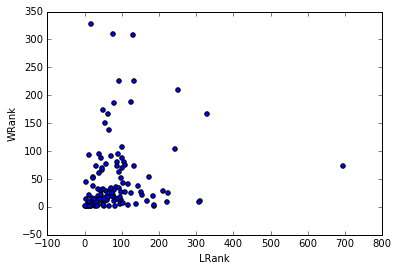

In [34]:
OZ_winnerMinusLooser.plot.scatter(x = 'LRank', y = 'WRank')

OZ_winnerMinusLooser['LRank'].corr(OZ_winnerMinusLooser['WRank'], method= 'pearson')

In [26]:
data_2016.Tournament.unique()


array(['Brisbane International', 'Chennai Open', 'Qatar Exxon Mobil Open',
       'ASB Classic', 'Apia International', 'Australian Open',
       'Open Sud de France', 'Ecuador Open', 'Garanti Koza Sofia Open',
       'Argentina Open', 'Memphis Open',
       'ABN AMRO World Tennis Tournament', 'Delray Beach Open', 'Open 13',
       'Rio Open', 'Abierto Mexicano', 'Dubai Tennis Championships',
       'Brasil Open', 'BNP Paribas Open', 'Sony Ericsson Open',
       "U.S. Men's Clay Court Championships", 'Grand Prix Hassan II',
       'Monte Carlo Masters', 'Open Banco Sabadell ',
       'BRD Nastase Tiriac Trophy', 'Millenium Estoril Open',
       'Istanbul Open', 'BMW Open', 'Mutua Madrid Open',
       "Internazionali BNL d'Italia", 'Geneva Open',
       'Open de Nice Côte d’Azur', 'French Open', 'Topshelf Open',
       'Mercedes Cup', 'Gerry Weber Open', 'AEGON Championships',
       'AEGON Open', 'Wimbledon', 'SkiStar Swedish Open',
       'German Tennis Championships', 'Hall of Fame Ch

In [140]:
results = {'Name':['Gill', 'Steph', 'Sally', 'Mum', 'Hayley', 'Sharmie', 'Claire', 'Sarah', 'Helen', 'Paul'],
          'GuessDateTime': ['27-05-2017 0600', '06-01-2017 1400', '28-05-2017 0430', '27-05-2017 1430', 
                   '27-05-2017 0340', '25-05-2017 1910', '29-05-2017 1702', '25-05-2017 1430', 
                   '29-05-2017 1600', '02-06-2017 1400'],
          'Weight_P': [3175, 2722, 2722, 3628, 3628, 3175, 3175, 3628, 3628,3628],
          'Weight_O': [198, 142, 340, 198, 57, 283, 369,142,255, 283]}


In [141]:
df = pd.DataFrame(results)
df['Metric'] = df['Weight_O'] + df['Weight_P']
df['GuessDateTime'] = pd.to_datetime(df['GuessDateTime'])

df['BirthDayAndTime'] = '2017-05-29 18:13:00'
df['BirthDayAndTime'] = pd.to_datetime(df['BirthDayAndTime'])

df['timeDistance'] = df['GuessDateTime'] - df['BirthDayAndTime']

df['Metric'] = df['Metric'] - 3742

df['timeDistance'] = df['timeDistance'] / np.timedelta64(1, 'h')

df

,GuessDateTime,Name,Weight_O,Weight_P,Metric,BirthDayAndTime,timeDistance
0,2017-05-27 06:00:00,Gill,198,3175,-369,2017-05-29 18:13:00,-60.216667
1,2017-06-01 14:00:00,Steph,142,2722,-878,2017-05-29 18:13:00,67.783333
2,2017-05-28 04:30:00,Sally,340,2722,-680,2017-05-29 18:13:00,-37.716667
3,2017-05-27 14:30:00,Mum,198,3628,84,2017-05-29 18:13:00,-51.716667
4,2017-05-27 03:40:00,Hayley,57,3628,-57,2017-05-29 18:13:00,-62.550000
5,2017-05-25 19:10:00,Sharmie,283,3175,-284,2017-05-29 18:13:00,-95.050000
6,2017-05-29 17:02:00,Claire,369,3175,-198,2017-05-29 18:13:00,-1.183333
7,2017-05-25 14:30:00,Sarah,142,3628,28,2017-05-29 18:13:00,-99.716667
8,2017-05-29 16:00:00,Helen,255,3628,141,2017-05-29 18:13:00,-2.216667
9,2017-02-06 14:00:00,Paul,283,3628,169,2017-05-29 18:13:00,-2692.216667


In [142]:
new_df = pd.DataFrame()
new_df['Name'] = df['Name']

new_df['Metric'] = df['Metric'].abs()
new_df['timeDistance'] = df['timeDistance'].abs()

new_df

,Name,Metric,timeDistance
0,Gill,369,60.216667
1,Steph,878,67.783333
2,Sally,680,37.716667
3,Mum,84,51.716667
4,Hayley,57,62.550000
5,Sharmie,284,95.050000
6,Claire,198,1.183333
7,Sarah,28,99.716667
8,Helen,141,2.216667
9,Paul,169,2692.216667


In [143]:
normalize = (lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

cols_to_norm = ['Metric', 'timeDistance']


new_df[cols_to_norm] = new_df[cols_to_norm].apply(normalize)

new_df['final_score'] = new_df['Metric'] + new_df['timeDistance']

new_df['Actual_w_diff'] = df['Metric'].abs()
new_df['Actual_T_diff'] = df['timeDistance'].abs()

new_df

,Name,Metric,timeDistance,final_score,Actual_w_diff,Actual_T_diff
0,Gill,0.401176,0.021937,0.423114,369,60.216667
1,Steph,1.000000,0.024749,1.024749,878,67.783333
2,Sally,0.767059,0.013576,0.780635,680,37.716667
3,Mum,0.065882,0.018778,0.084661,84,51.716667
4,Hayley,0.034118,0.022804,0.056922,57,62.550000
5,Sharmie,0.301176,0.034881,0.336058,284,95.050000
6,Claire,0.200000,0.000000,0.200000,198,1.183333
7,Sarah,0.000000,0.036615,0.036615,28,99.716667
8,Helen,0.132941,0.000384,0.133325,141,2.216667
9,Paul,0.165882,1.000000,1.165882,169,2692.216667
